In [ ]:
pip install git+https://github.com/ResidentMario/missingno.git

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer 
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
import missingno as msno

In [52]:
import myutils.preprocessing as pp 
import myutils.visualization as vz
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
def read_data(data_dir,fileNames):
    path = os.path.join(data_dir,fileNames)
    df = pd.read_csv(path)
    return df

In [70]:
data_dir = '../Data'
fName1 = 'train.csv'
fName2 = 'test.csv'
fName3 = 'data_dictionary.csv'

trainData = read_data(data_dir,fName1)
testData = read_data(data_dir,fName2)
dataDict = read_data(data_dir,fName3)

random_seed = 20030309

# Data Understanding and Inspection

In [55]:
dataDict

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']


In [56]:
print(trainData.head(5))

   ID                       dri_score psych_disturb    cyto_score diabetes  \
0   0  N/A - non-malignant indication            No           NaN       No   
1   1                    Intermediate            No  Intermediate       No   
2   2  N/A - non-malignant indication            No           NaN       No   
3   3                            High            No  Intermediate       No   
4   4                            High            No           NaN       No   

   hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
0               NaN             NaN              No TBI         No   
1               2.0             8.0  TBI +- Other, >cGy         No   
2               2.0             8.0              No TBI         No   
3               2.0             8.0              No TBI         No   
4               2.0             8.0              No TBI         No   

   hla_low_res_6  ...          tce_div_match donor_related  \
0            6.0  ...                    NaN    

In [57]:
print(trainData.shape)

(28800, 60)


In [58]:
print(trainData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [59]:
missing_values = trainData.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

tce_match                 18996
mrd_hct                   16597
cyto_score_detail         11923
tce_div_match             11396
tce_imm_match             11133
cyto_score                 8068
hla_high_res_10            7163
hla_high_res_8             5829
hla_high_res_6             5284
hla_match_dqb1_high        5199
hla_low_res_10             5064
conditioning_intensity     4789
hla_match_c_high           4620
hla_match_a_high           4301
hla_nmdp_6                 4197
hla_match_dqb1_low         4194
hla_match_b_high           4088
hla_low_res_8              3653
hla_match_drb1_high        3352
hla_low_res_6              3270
hla_match_c_low            2800
hla_match_drb1_low         2643
hla_match_b_low            2565
cardiac                    2542
peptic_ulcer               2419
hla_match_a_low            2390
arrhythmia                 2202
rheum_issue                2183
rituximab                  2148
pulm_severe                2135
diabetes                   2119
psych_di

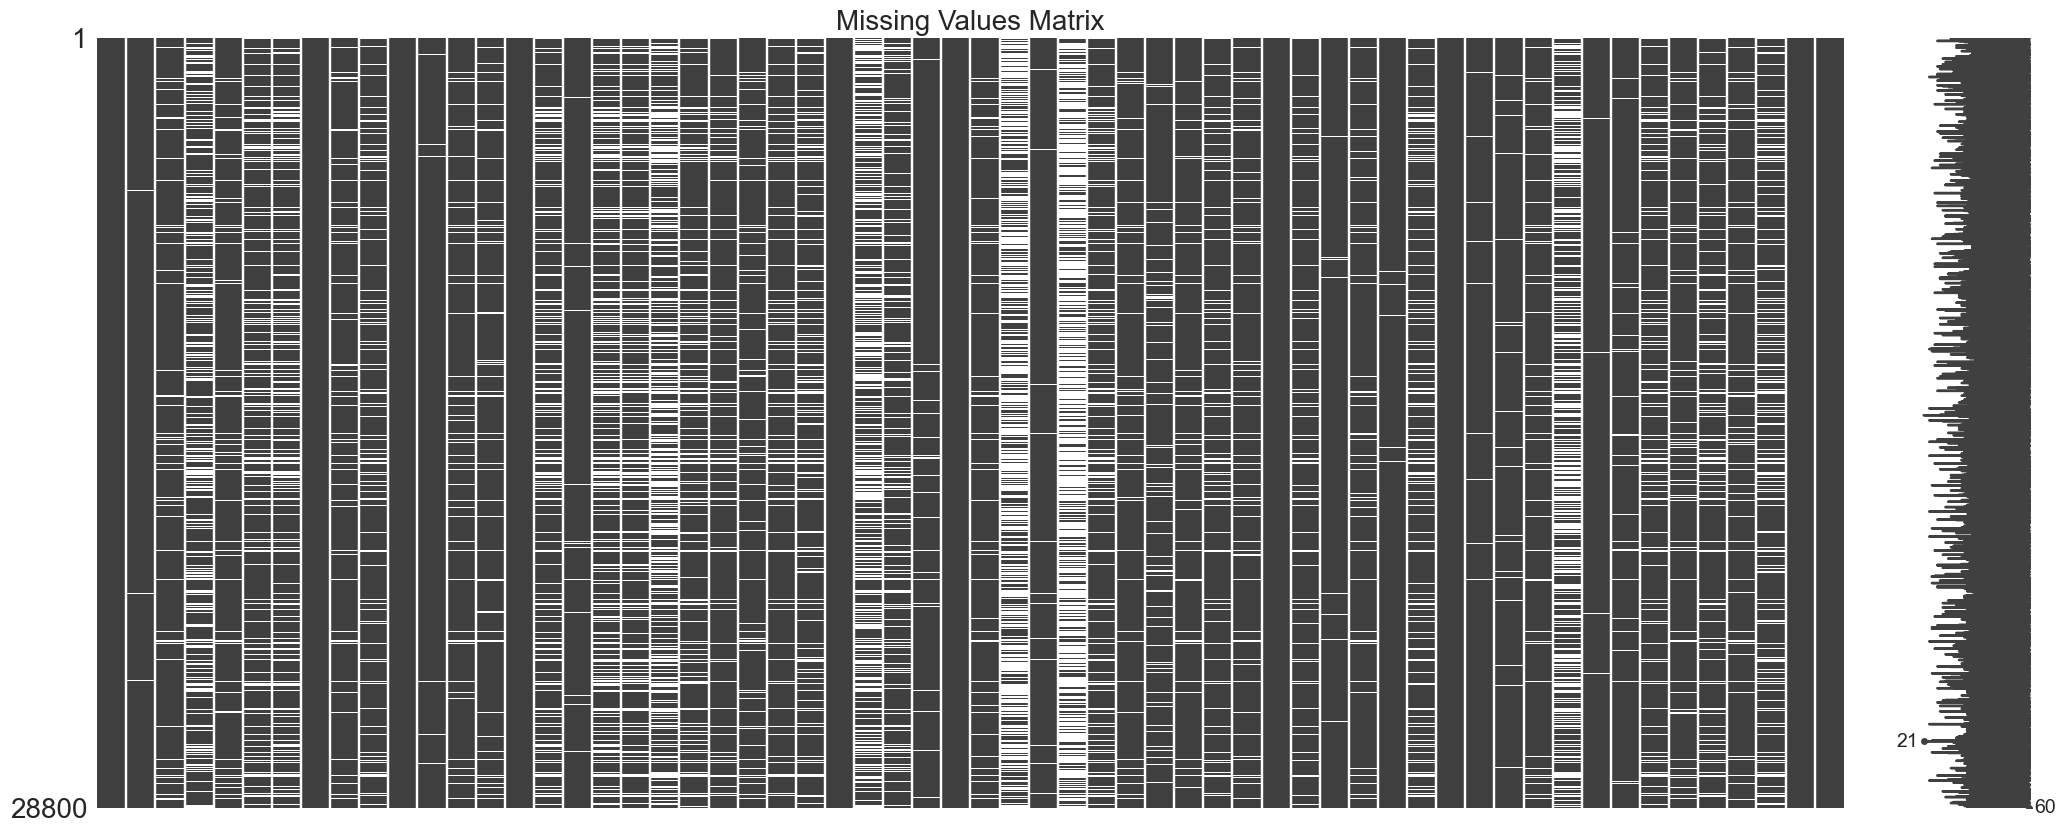

In [60]:
vz.plot_missing_values(trainData)


In [61]:
missing_values = pp.missing_val_df(trainData)
missing_values = missing_values.merge(dataDict[['variable', 'description']], left_on='variables', right_on='variable', how='left')
missing_values.drop(columns=['variable'], inplace=True)
missing_values.rename(columns={'description': 'Variable Description'}, inplace=True)

missing_values

,variables,Missing Values,Missing Percent,Data Type,Variable Description
0,tce_match,18996,65.96,object,T-cell epitope matching
1,mrd_hct,16597,57.63,object,MRD at time of HCT (AML/ALL)
2,cyto_score_detail,11923,41.40,object,Cytogenetics for DRI (AML/MDS)
3,tce_div_match,11396,39.57,object,T-cell epitope matching
4,tce_imm_match,11133,38.66,object,T-cell epitope immunogenicity/diversity match
5,cyto_score,8068,28.01,object,Cytogenetic score
6,hla_high_res_10,7163,24.87,float64,Recipient / 1st donor allele-level (high resol...
7,hla_high_res_8,5829,20.24,float64,Recipient / 1st donor allele-level (high resol...
8,hla_high_res_6,5284,18.35,float64,Recipient / 1st donor allele-level (high resol...
9,hla_match_dqb1_high,5199,18.05,float64,Recipient / 1st donor allele level (high resol...


In [62]:
# Detect duplicate rows
duplicate_rows = trainData[trainData.duplicated()]

# Show duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [ID, dri_score, psych_disturb, cyto_score, diabetes, hla_match_c_high, hla_high_res_8, tbi_status, arrhythmia, hla_low_res_6, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, hla_high_res_6, cmv_status, hla_high_res_10, hla_match_dqb1_high, tce_imm_match, hla_nmdp_6, hla_match_c_low, rituximab, hla_match_drb1_low, hla_match_dqb1_low, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, year_hct, obesity, mrd_hct, in_vivo_tcd, tce_match, hla_match_a_high, hepatic_severe, donor_age, prior_tumor, hla_match_b_low, peptic_ulcer, age_at_hct, hla_match_a_low, gvhd_proph, rheum_issue, sex_match, hla_match_b_high, race_group, comorbidity_score, karnofsky_score, hepatic_mild, tce_div_match, donor_related, melphalan_dose, hla_low_res_8, cardiac, hla_match_drb1_high, pulm_moderate, hla_low_res_10, efs, efs_time]
Index: []

[0 rows x 60 columns]


# Data Preprocessing

In [63]:
trainData_num = pp.numeric_df(trainData)
trainData_num
missing_values_num = pp.missing_val_df(trainData_num)



In [64]:
missing_values_num

,variables,Missing Values,Missing Percent,Data Type
0,hla_high_res_10,7163,24.87,float64
1,hla_high_res_8,5829,20.24,float64
2,hla_high_res_6,5284,18.35,float64
3,hla_match_dqb1_high,5199,18.05,float64
4,hla_low_res_10,5064,17.58,float64
5,hla_match_c_high,4620,16.04,float64
6,hla_match_a_high,4301,14.93,float64
7,hla_nmdp_6,4197,14.57,float64
8,hla_match_dqb1_low,4194,14.56,float64
9,hla_match_b_high,4088,14.19,float64


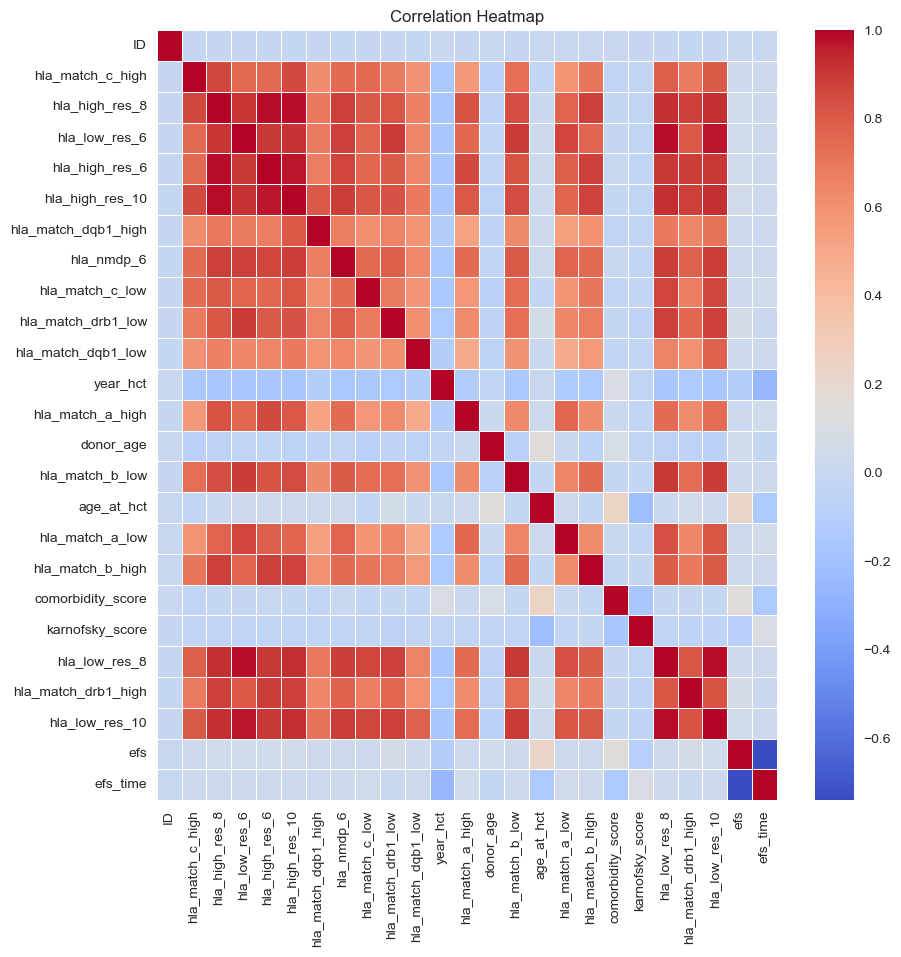

In [65]:
vz.cor_heatmap(trainData_num)

In [68]:
hla_columns = [col for col in trainData_num.columns if col.startswith('hla_')]
hla_data = trainData_num[hla_columns]

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="distance")  

# Apply the KNNImputer
hla_imputed = imputer.fit_transform(hla_data)

# Replace the imputed data in the original DataFrame
trainData_num[hla_columns] = hla_imputed

# Check the imputed dataset
print(trainData_num[hla_columns].head())

   hla_match_c_high  hla_high_res_8  hla_low_res_6  hla_high_res_6  \
0               2.0             8.0            6.0             6.0   
1               2.0             8.0            6.0             6.0   
2               2.0             8.0            6.0             6.0   
3               2.0             8.0            6.0             6.0   
4               2.0             8.0            6.0             6.0   

   hla_high_res_10  hla_match_dqb1_high  hla_nmdp_6  hla_match_c_low  \
0             10.0                  2.0         6.0              2.0   
1             10.0                  2.0         6.0              2.0   
2             10.0                  2.0         6.0              2.0   
3             10.0                  2.0         6.0              2.0   
4             10.0                  2.0         5.0              2.0   

   hla_match_drb1_low  hla_match_dqb1_low  hla_match_a_high  hla_match_b_low  \
0                 2.0                 2.0               2.0       

In [73]:
trainData_num_copy = trainData_num.copy()
imputerIte = IterativeImputer(max_iter=10, random_state=random_seed)
imputed_values = imputerIte.fit_transform(trainData_num_copy)

trainData_num_copy = pd.DataFrame(imputed_values, columns=trainData_num.columns)

In [78]:
trainData_num_copy.isnull().sum()

ID                     0
hla_match_c_high       0
hla_high_res_8         0
hla_low_res_6          0
hla_high_res_6         0
hla_high_res_10        0
hla_match_dqb1_high    0
hla_nmdp_6             0
hla_match_c_low        0
hla_match_drb1_low     0
hla_match_dqb1_low     0
year_hct               0
hla_match_a_high       0
donor_age              0
hla_match_b_low        0
age_at_hct             0
hla_match_a_low        0
hla_match_b_high       0
comorbidity_score      0
karnofsky_score        0
hla_low_res_8          0
hla_match_drb1_high    0
hla_low_res_10         0
efs                    0
efs_time               0
dtype: int64

In [66]:
cat_col = pp.get_cat_cols(trainData)
trainData_cat = trainData[cat_col]
trainData_cat.head()

,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,vent_hist,renal_issue,pulm_severe,...,gvhd_proph,rheum_issue,sex_match,race_group,hepatic_mild,tce_div_match,donor_related,melphalan_dose,cardiac,pulm_moderate
0,N/A - non-malignant indication,No,NaN,No,No TBI,No,Bone marrow,No,No,No,...,FKalone,No,M-F,More than one race,No,NaN,Unrelated,"N/A, Mel not given",No,No
1,Intermediate,No,Intermediate,No,"TBI +- Other, >cGy",No,Peripheral blood,No,No,No,...,Other GVHD Prophylaxis,No,F-F,Asian,No,Permissive mismatched,Related,"N/A, Mel not given",No,Yes
2,N/A - non-malignant indication,No,NaN,No,No TBI,No,Bone marrow,No,No,No,...,Cyclophosphamide alone,No,F-M,More than one race,No,Permissive mismatched,Related,"N/A, Mel not given",No,No
3,High,No,Intermediate,No,No TBI,No,Bone marrow,No,No,No,...,FK+ MMF +- others,No,M-M,White,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",No,No
4,High,No,NaN,No,No TBI,No,Peripheral blood,No,No,No,...,TDEPLETION +- other,No,M-F,American Indian or Alaska Native,No,Permissive mismatched,Related,MEL,No,No
